['CATAID', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG', 'Z_1', 'nQ_1', 'SURVEY_CODE', 'SURVEY_CLASS', 'Z_TONRY_1', 'fluxscale', 'zmax_19p8', 'zmax_19p4', 'zmax_19p0', 'zmax_17p8', 'nbands', 'S2N', 'PPP', 'logmstar', 'dellogmstar', 'logmoverl_i', 'dellogmoverl_i', 'logage', 'dellogage', 'logtau', 'dellogtau', 'logmintsfh', 'dellogmintsfh', 'logmremnants', 'dellogmremnants', 'metal', 'delmetal', 'extBV', 'delextBV', 'logLWage', 'dellogLWage', 'gminusi', 'delgminusi', 'uminusr', 'deluminusr', 'gminusi_stars', 'uminusr_stars', 'C_logM_ur', 'C_logM_gi', 'C_logM_eBV', 'fitphot_u', 'delfitphot_u', 'absmag_u', 'delabsmag_u', 'absmag_u_stars', 'fitphot_g', 'delfitphot_g', 'absmag_g', 'delabsmag_g', '

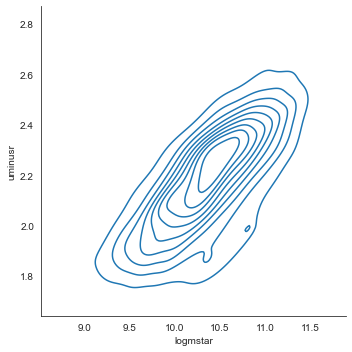

LinregressResult(slope=0.28390952820715426, intercept=-0.7684767034311015, rvalue=0.713420788124427, pvalue=6.178673342203584e-283, stderr=0.006542008472505019, intercept_stderr=0.06789725680506256)
0.28390952820715426 -0.7684767034311015
RedBlue
-------
   True
   True
   True
   True
   True
   True
  False
    ...
  False
   True
  False
   True
  False
   True
   True
Length = 1819 rows
Total : 1819
Red   : 1691
Blue  : 128


In [65]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

RErange = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]

print(RErange.colnames)

yfield = 'uminusr'
xfield ='logmstar'

# set seaborn style
#sns.set_style("white")

values = np.vstack([RErange[xfield],RErange[yfield]])
#df = values.to_pandas()
df = RErange.to_pandas()
#df = df[df.flux != 0]
#df = pd.DataFrame(values,columns=['x', 'y'])
#df = pd.DataFrame(values)
#df = pd.DataFrame()
#df[xfield] = RErange[xfield]
#df[yfield] = RErange[yfield]
#df = pd.DataFrame(RErange[xfield],RErange[yfield], columns=['x', 'y'])
#print(df)
# Basic 2D density plot
#sns.kdeplot(x=RErange[xfield], y=RErange[yfield], cmap='Blues')
#sns.displot(df, x=xfield, y=yfield, kind="kde")
sns.displot(df, x='logmstar', y='uminusr', kind="kde")
#sns.displot(df, kind="kde")
#sns.kdeplot(df);
#sns.kdeplot(RErange[xfield], RErange[yfield], cmap='Blues')
plt.show()
print(stats.linregress(RErange[xfield],RErange[yfield]))
m,c,r,p,e = stats.linregress(RErange[xfield],RErange[yfield])
print(m,c)
delta = 0.2
RErange.add_column(RErange[yfield] > RErange[xfield]*m + c-delta,name='RedBlue')
print(RErange['RedBlue'])
red = len(RErange[RErange['RedBlue'] == True])
num = len(RErange)
blue = num - red
print('Total : '+str(num))
print('Red   : '+str(red))
print('Blue  : '+str(blue))